In [1]:
import numpy as np
import sklearn
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [15]:
warnings.filterwarnings('ignore') 
plt.style.use('classic')
PATH = 'C:/WorkSpace/StatisticsForData/data/'

# Resampling

In [3]:

session_times = pd.read_csv(PATH+'web_page_data.csv')
session_times.Time *= 100
session_times.head()

,Page,Time
0,Page A,21.0
1,Page B,253.0
2,Page A,35.0
3,Page B,71.0
4,Page A,67.0


<Figure size 560x400 with 0 Axes>

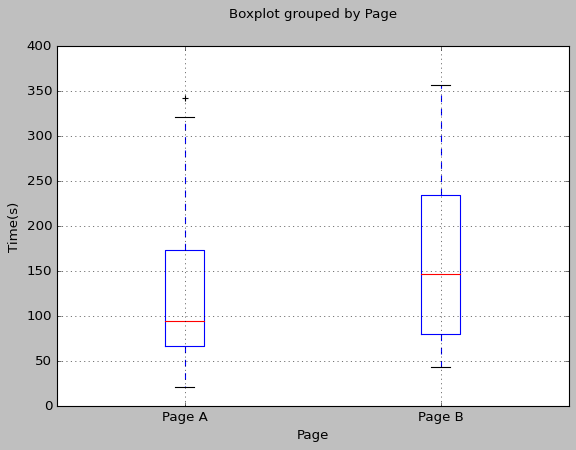

In [16]:
# A보다 B에서 좀더 많이 머무는 경향이 있다.
plt.figure(figsize = (7,5))
session_times.boxplot(by = 'Page', column='Time')
plt.ylabel('Time(s)')
plt.title('')
plt.show()

In [5]:
meanA = session_times.groupby('Page').mean().values[0][0]
meanB = session_times.groupby('Page').mean().values[1][0]
print(meanA, meanB)

126.33333333333333 162.0


In [6]:
na = session_times.groupby('Page').count().values[0][0]
nb = session_times.groupby('Page').count().values[1][0]
print(na,nb)

21 15


## 순열 검정
### 두개 이상의 표본을 재결합하여 무작위 재샘플링한다.
### 무작위로 재샘플링된 표본을 원래의 표본과 비교한다.

In [7]:
import random
def perm_fun(x, nA, nB) :
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[idx_B].mean() - x.loc[idx_A].mean()

perm_fun(session_times,na,nb)

Time    9.609524
dtype: float64

In [8]:
# 오래 걸림(20s)
perm_diffs = [perm_fun(session_times.Time, na, nb) for _ in range(1000)]

### 페이지 B가 페이지 A에 비해 우연히 더 많이 봤을 확률은 약 12%라고 말할 수 있다.

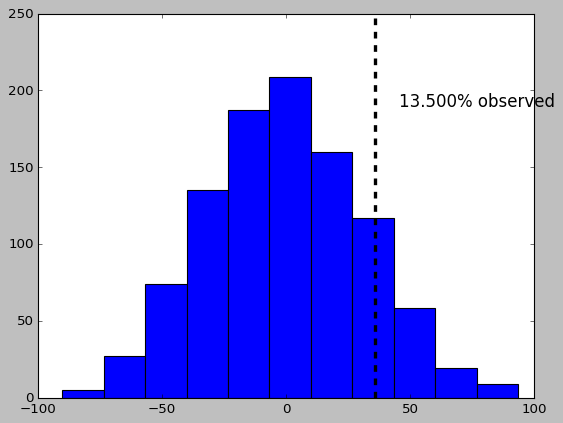

In [17]:
pct = np.array(perm_diffs > (meanB-meanA)).mean()
plt.hist(perm_diffs, bins = 11)
plt.axvline(x = meanB-meanA, color = 'k', lw = 3, ls = '--')
plt.text(meanB-meanA + 10,190, f"{pct*100:0.3f}% observed", fontdict={"fontsize" : 15})
plt.show()

# 통계적 유의성과 p-value

|결과|가격 A|가격 B|
|-|-|-|
|전환|200|182|
|비전환|23,539|22,406|

In [10]:
A_pct = 200/(23529+200)
B_pct = 182/(22406+182)
observed = np.float64(A_pct - B_pct)*100
print(f"A의 전환 비율은 B의 {A_pct / B_pct:0.4f} 배이다")
print(f"이는 {observed : 0.4f} %p  만큼 높다")

A의 전환 비율은 B의 1.0461 배이다
이는  0.0371 %p  만큼 높다


In [11]:
conversion = np.array([0]*45945 + [1]*382)

### A와 B의 데이터가 많고 A가 B보다 5% 정도 많으니 유의미해보인다.

In [12]:
# 오래걸림(40s)
conversion = np.array([0]*45945 + [1]*382)
conversion = pd.Series(conversion)
perm_diffs_conversion =[100 * perm_fun(conversion, 23739, 22588) for _ in range(1000)]

### 실제로 검증하면 랜덤하게 뽑을 경우 약 33%의 확률로 A가 B보다 5% 이상 많다.
### 이는 A가 B보다 유의미하지 않을 확률이 높다는 것을 말한다.

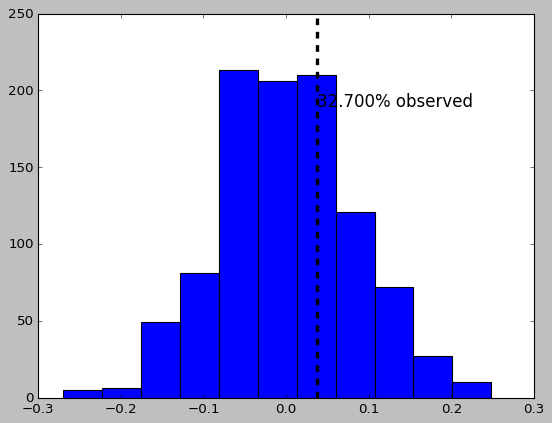

In [18]:
pct = np.array(perm_diffs_conversion > observed).mean()
plt.hist(perm_diffs_conversion, bins = 11)
plt.axvline(x = observed, color = 'k', lw = 3, ls = '--')
plt.text(observed ,190, f"{pct*100:0.3f}% observed", fontdict={"fontsize" : 15})
plt.show()

# P-value
### 위에서 계산한 약 33% 가 p-value가 된다.
### 순열 검증에서 표본을 추출하면 표본은 정규분포를 따르기 때문에 위와 같이 직접 구현하지 않아도 된다.

In [25]:
from scipy import stats
survivors = np.array([[200, 23739-200], [182, 22588-182]])
chi2, p_value, df, _ = stats.chi2_contingency(survivors)

print(f"p-value for single sided test : {p_value/2:0.4f}")


p-value for single sided test : 0.3498


# t - 검정

In [29]:
res = stats.ttest_ind(session_times[session_times.Page == 'Page A'].Time,
                      session_times[session_times.Page == 'Page B'].Time,
                      equal_var=False)

print(f"p-value for single sided test : {res.pvalue/2:0.4f}")

p-value for single sided test : 0.1408


,Page,Time
0,Page A,21.0
2,Page A,35.0
4,Page A,67.0
6,Page A,211.0
8,Page A,132.0
10,Page A,68.0
12,Page A,321.0
14,Page A,147.0
16,Page A,95.0
18,Page A,45.0
